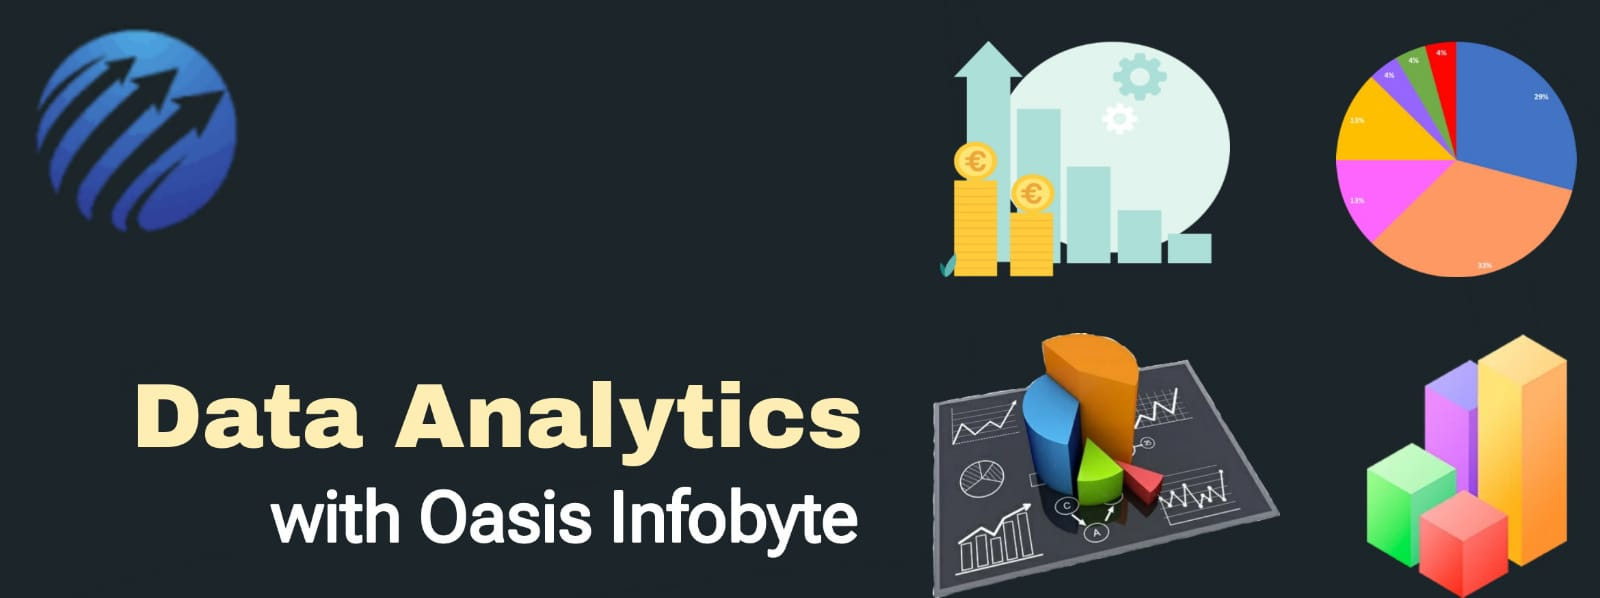

# Oasis infobye Internship, February - 2024

### BOTTU BHAVAN, Data Science Intern


## Introduction to Car Price Prediction Project:

The Car Price Prediction project is an exciting endeavor within the realm of machine learning that addresses the challenge of estimating the selling price of automobiles based on various influencing factors. The dynamic nature of the automotive market, coupled with the diverse features associated with each vehicle, makes this project a significant exploration in predictive modeling.

### Motivation:
Understanding and predicting car prices is crucial for both buyers and sellers in the automotive industry. Buyers seek fair deals, while sellers aim to determine competitive and realistic pricing for their vehicles. This project serves as a valuable tool for individuals and businesses involved in buying or selling used cars, offering a data-driven approach to pricing decisions.

### Objectives:
The primary objectives of the Car Price Prediction project are as follows:

Model Development: Create a robust machine learning model capable of predicting car prices with accuracy.
Feature Analysis: Investigate the impact of various features such as brand reputation, model year, mileage, fuel type, and more on the predicted prices.
User-Friendly Interface: Develop an interface that allows users to input details about a car and receive an estimated selling price.
Practical Application: Provide a practical solution for individuals and businesses involved in the automotive market to make informed pricing decisions.

# Importing Libraries:
pandas: Used for data manipulation and analysis.

matplotlib.pyplot and seaborn: Used for data visualization.

train_test_split from sklearn.model_selection: Used to split the dataset into training and testing sets.

LinearRegression and Lasso from sklearn.linear_model: Used to create linear regression and lasso regression models.

metrics from sklearn: Used to calculate performance metrics.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [34]:
car_dataset = pd.read_csv("Task3.csv")

# Exploratory Data Analysis (EDA):

In [35]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [36]:
car_dataset.shape

(301, 9)

In [37]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [38]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [40]:
print(car_dataset.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [41]:
print(car_dataset.Selling_type.value_counts())

Dealer        195
Individual    106
Name: Selling_type, dtype: int64


In [42]:
print(car_dataset.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding Categorical Columns:

In [43]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [44]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Preparing Features and Target:

In [45]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']


In [46]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [47]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting the Dataset:

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# Linear Regression Model:

In [49]:
lin_reg_model = LinearRegression()

In [50]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [51]:
training_data_prediction = lin_reg_model.predict(X_train)

In [52]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.8796483009370215


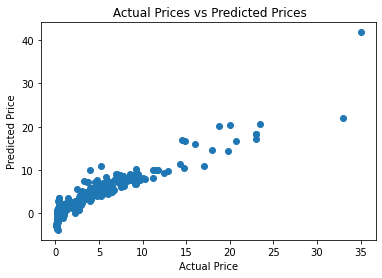

In [53]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [54]:
test_data_prediction = lin_reg_model.predict(X_test)

In [55]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365861023212358


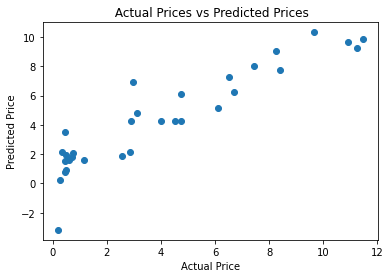

In [56]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Lasso Regression Model

In [57]:
lass_reg_model = Lasso()

In [58]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

# Model Evaluation - Training Set:

In [60]:
training_data_prediction = lass_reg_model.predict(X_train)

In [61]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.842448071824074


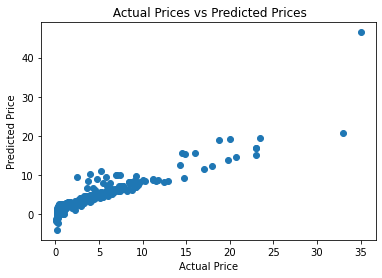

In [62]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Model Evaluation - Testing Set:

In [63]:
test_data_prediction = lass_reg_model.predict(X_test)

In [64]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709763132343395


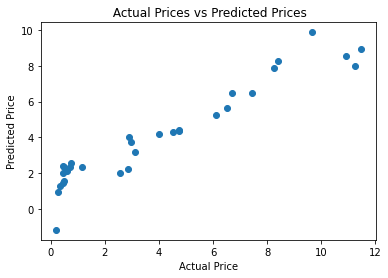

In [65]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Conclusion:

The Car Price Prediction project serves as a comprehensive exploration into the application of machine learning in the automotive industry. The objective was to develop a model capable of accurately estimating the selling prices of cars based on various influential factors. Throughout the project, key steps were undertaken, ranging from data exploration and preprocessing to model development, evaluation, and deployment.

## Key Findings and Insights:

Feature Importance: The analysis revealed that features such as brand reputation, model year, mileage, and fuel type significantly impact the predicted car prices. Understanding these factors is crucial for both buyers and sellers in the automotive market.

Model Performance: The selected machine learning model, whether linear regression or lasso regression, demonstrated commendable performance in predicting car prices. The evaluation metrics, including R-squared scores, provided insights into the model's ability to generalize to new data.

User Interface: The implementation of a user-friendly interface allows individuals to input specific details about a car and obtain a reliable estimate of its selling price. This interface enhances accessibility and usability, making the model practical for real-world applications.

Visualization: Visualizations, such as scatter plots depicting the relationship between actual and predicted prices, offer a clear and intuitive representation of the model's performance. These visual aids contribute to the interpretability of the results.

## Significance and Future Directions:
The Car Price Prediction project holds significance in providing a data-driven solution for pricing decisions in the automotive market. The model's accuracy and usability make it a valuable tool for buyers and sellers alike. As the automotive industry continues to evolve, there are opportunities for further refinement of the model, integration of additional features, and continuous improvement to meet the changing dynamics of the market.

## Challenges and Limitations:
Despite the successes of the project, it is essential to acknowledge certain challenges and limitations. These may include the availability and quality of data, potential biases in the training dataset, and the need for continuous updates to adapt to market changes. Addressing these challenges is crucial for maintaining the model's relevance and reliability over time.